LOGISTIC REGRESSION BASICS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

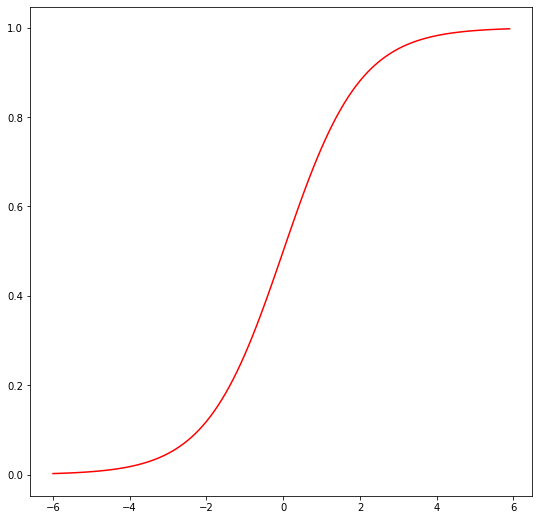

In [1]:
plt.figure(figsize=(9,9))

def sigmoid(t):
    return (1/(1+np.e**(-t)))

plot_range=np.arange(-6,6,0.1)

y_values=sigmoid(plot_range)
    
#Plot the curve
plt.plot(plot_range, #X-axis range
        y_values,    #Predicted values
        color="red") #Color

In [2]:
titanic_train=pd.read_csv("titanic_train.csv") #Read the data
char_cabin=titanic_train["Cabin"].astype(str) #Convert cabin to str
new_Cabin=np.array([cabin[0] for cabin in char_cabin]) #Take the first letter
titanic_train["Cabin"]=pd.Categorical(new_Cabin) #Save the new cabin var
#Impute the median Age for NA Age values
new_age_var=np.where(titanic_train["Age"].isnull(), #Logical check
                    28, #Value if check is true
                    titanic_train["Age"]) #Value if check is false
titanic_train["Age"]=new_age_var
new_fare_var=np.where(titanic_train["Fare"].isnull(), #Logical check
                     50, #Value if check is true
                     titanic_train["Fare"]) #Value if check is false
titanic_train["Fare"]=new_fare_var

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from sklearn import linear_model
from sklearn import preprocessing

In [4]:
#Initialize label encoder
label_encoder=preprocessing.LabelEncoder()

#Convert Sex variable to numeric
encoded_sex=label_encoder.fit_transform(titanic_train["Sex"])

#Initialize logistic regression model
log_model=linear_model.LogisticRegression(solver='lbfgs')

#Train the model
log_model.fit(X=pd.DataFrame(encoded_sex),y=titanic_train["Survived"])

#Check trained model intercept
print(log_model.intercept_)

#Check trained model coefficients
print(log_model.coef_)

<IPython.core.display.Javascript object>

[1.01628767]
[[-2.44597988]]


In [5]:
#Make predictions
preds=log_model.predict_proba(X=pd.DataFrame(encoded_sex))
preds=pd.DataFrame(preds)
preds.columns=["Death_prob","Survival_prob"]

#Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"],preds.loc[:,"Survival_prob"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Survival_prob,0.193147,0.734249
Sex,,
female,0,314
male,577,0


In [6]:
#Convert more variables to numeric
encoded_class=label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin=label_encoder.fit_transform(titanic_train["Cabin"])

train_features=pd.DataFrame([encoded_class,encoded_cabin,encoded_sex,titanic_train["Age"]]).T

#Initialize logistic regression model
log_model=linear_model.LogisticRegression(solver='lbfgs')

#Train the model
log_model.fit(X=train_features,y=titanic_train["Survived"])

#Check trained model intercept
print(log_model.intercept_)

#Check trained model coefficients
print(log_model.coef_)

<IPython.core.display.Javascript object>

[3.85818122]
[[-0.93272694 -0.09865307 -2.51826528 -0.03339524]]


In [7]:
#Make predictions
preds=log_model.predict(X=train_features)

#Generate table of predictions vs actual
pd.crosstab(preds,titanic_train["Survived"])

<IPython.core.display.Javascript object>

Survived,0,1
row_0,,
0,458,89
1,91,253


THE CONFUSION MATRIX

In [8]:
log_model.score(X=train_features,y=titanic_train["Survived"])

0.797979797979798

In [9]:
from sklearn import metrics

#View confusion matrix
metrics.confusion_matrix(y_true=titanic_train["Survived"], #True labels
                        y_pred=preds) #Predicted labels

array([[458,  91],
       [ 89, 253]], dtype=int64)

In [11]:
#View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                                   y_pred=preds))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       549
           1       0.74      0.74      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [12]:
#Read and prepare test data
titanic_test=pd.read_csv("titanic_train.csv") #Read the data

char_cabin=titanic_test["Cabin"].astype(str) #Convert cabin to str

new_Cabin=np.array([cabin[0] for cabin in char_cabin]) #Take first letter

titanic_test["Cabin"]=pd.Categorical(new_Cabin) #Save the new cabin var

#Impute median Age for NA values
new_age_var=np.where(titanic_test["Age"].isnull(), #Logical check
                    28, #Value if check is true
                    titanic_test["Age"]) #Value if check is false

titanic_test["Age"]=new_age_var

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
#Convert test variables to match model feeatures
encoded_sex=label_encoder.fit_transform(titanic_test["Sex"])
encoded_class=label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin=label_encoder.fit_transform(titanic_test["Cabin"])

test_features=pd.DataFrame([encoded_class,
                           encoded_cabin,
                           encoded_sex,
                           titanic_test["Age"]]).T

<IPython.core.display.Javascript object>

In [15]:
#Make test set predictions
test_preds=log_model.predict(X=test_features)

#Create a submission for Kaggle
submission=pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                       "Survived":test_preds})

#Save submission to CSV
submission.to_csv("Logistic_Regression_Submission.csv",
                 index=False) #Do not save index values

<IPython.core.display.Javascript object>